# Radhika Ambulkar
data analyst intern duration : 1 August 2024 to 30 September 2024

# The dataset contains 27,481 rows and 4 columns with the following structure:

Columns:
textID: A unique identifier for each tweet (no missing values).
text: The full text of the tweet (1 missing value).
selected_text: A part of the tweet that reflects the sentiment (1 missing value).
sentiment: The sentiment of the tweet, labeled as either positive, neutral, or negative (no missing values).
Steps for Sentiment Analysis:
Data Cleaning:

Handle missing values in the text and selected_text columns.
Remove unwanted characters, stop words, and punctuation from the text.
Text Preprocessing:

Tokenization: Break down the text into words or tokens.
Lemmatization/Stemming: Convert words to their base forms.
Convert all text to lowercase for uniformity.
Label Encoding:

Map the sentiment labels to numeric values, e.g., Positive = 1, Neutral = 0, Negative = -1.
Feature Extraction:

Use techniques like Bag of Words (BoW) or TF-IDF (Term Frequency-Inverse Document Frequency) to convert text data into numerical form.
Model Building:

Choose a machine learning algorithm (e.g., Logistic Regression, Naive Bayes, or Random Forest) to train a sentiment classification model.
Model Training:

Split the dataset into training and test sets.
Train the model using the extracted features and sentiment labels.
Model Evaluation:

Evaluate the model using metrics like accuracy, precision, recall, F1-score, and confusion matrix.
Tuning and Optimization:

Optimize the model using techniques such as cross-validation and hyperparameter tuning.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('tweets.csv')

In [5]:
print(df.shape)

(27481, 4)


In [6]:
print(df.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative  


In [7]:
print(df.tail())

           textID                                               text  \
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  


In [8]:
print(df.describe())

            textID                                  text selected_text  \
count        27481                                 27480         27480   
unique       27481                                 27480         22463   
top     cb774db0d1   I`d have responded, if I were going          good   
freq             1                                     1           199   

       sentiment  
count      27481  
unique         3  
top      neutral  
freq       11118  


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB
None


In [15]:
df.dropna(subset=['text', 'selected_text'], inplace=True)
df.reset_index(drop=True, inplace=True)
print("No of null values :\n",df.isnull().sum())
print("Value count of sentiments : \n",df['sentiment'].value_counts())

No of null values :
 textID           0
text             0
selected_text    0
sentiment        0
dtype: int64
Value count of sentiments : 
 sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


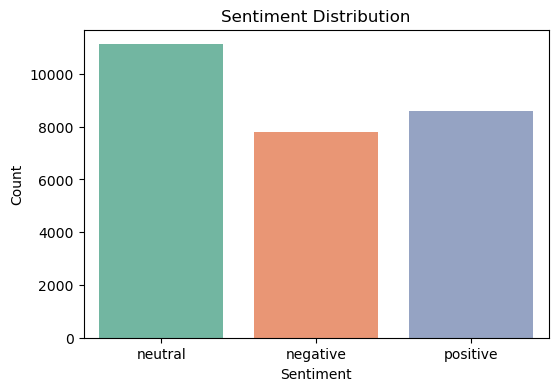

In [18]:
df['sentiment'] = df['sentiment'].astype(str)
try:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='sentiment', palette="Set2")
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

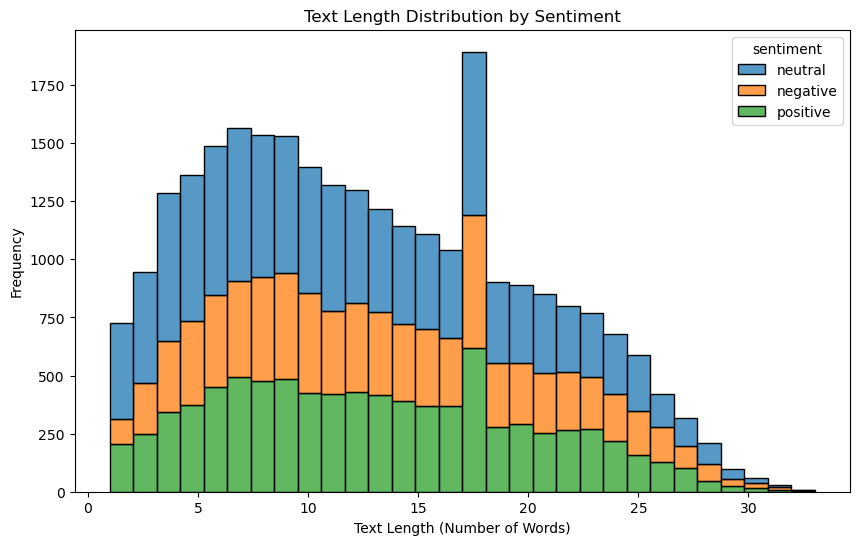

In [19]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='text_length', hue='sentiment', multiple='stack', bins=30)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()


In [24]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for text cleaning
def clean_text(text):
    # Remove URLs, mentions, hashtags, and special characters
    text = re.sub(r'http\S+|@\w+|#\w+|[^A-Za-z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    
    return ' '.join(tokens)

# Apply text cleaning to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode the sentiment column (positive=1, neutral=0, negative=-1)
encoder = LabelEncoder()
df['sentiment_label'] = encoder.fit_transform(df['sentiment'])


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text to numeric features
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Define the target variable (sentiment labels)
y = df['sentiment_label']


In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)



In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict the test set results
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1572
     neutral       0.62      0.75      0.68      2236
    positive       0.77      0.70      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496

Confusion Matrix:
[[ 892  589   91]
 [ 296 1679  261]
 [  62  447 1179]]


In [38]:
from sklearn.naive_bayes import MultinomialNB

# Initialize and train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)

# Evaluate
accuracy_nb = accuracy_score(y_test, nb_pred)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')


Naive Bayes Accuracy: 0.64


The logistic regression is performing well as compared to Naive Bayes

In [52]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target variable
# Split the data and also return the indices
X_train, X_test, y_train, y_test, train_indices, test_indices = train_test_split(
    X, y, df.index, test_size=0.2, random_state=42
)

# Step 1: Make Predictions on the Test Set
y_pred = model.predict(X_test)

# Step 2: Evaluate the Model's Performance

# Accuracy: Percentage of correctly classified instances
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 3: Detailed Classification Report (Precision, Recall, F1-Score)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# Step 4: Confusion Matrix (To understand the distribution of correct and incorrect classifications)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Step 5: Debug the test indices to ensure they match the original DataFrame
print(f"Test indices: {test_indices[:5]}")  # Print the first 5 test indices

# Display Sample Predictions
for i in range(30):  # Displaying the first 5 predictions
    original_index = test_indices[i]  # Get the original index from the test set

    # Debugging statement to verify index and its presence in DataFrame
    print(f"Original index being used: {original_index}")
    
    if original_index in df.index:
        print(f"Tweet : {df.loc[original_index]['text']}")  # Display the original text
        print(f"Predicted Sentiment: {encoder.inverse_transform([y_pred[i]])[0]}\n")
    else:
        print(f"Index {original_index} not found in DataFrame!")


Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.57      0.63      1572
     neutral       0.62      0.75      0.68      2236
    positive       0.77      0.70      0.73      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496

Confusion Matrix:
[[ 892  589   91]
 [ 296 1679  261]
 [  62  447 1179]]
Test indices: Index([1588, 10413, 6561, 2602, 4003], dtype='int64')
Original index being used: 1588
Tweet :  Enjoy! Family trumps everything
Predicted Sentiment: positive

Original index being used: 10413
Tweet :  --of them kinda turns me off of it all.  And then I buy more of them and dig a deeper hole, etc. ;;
Predicted Sentiment: neutral

Original index being used: 6561
Tweet : Clive it`s my birthday pat me  http://apps.facebook.com/dogbook/profile/view/6386106
Predicted Sentiment: neutral

Original 